# Visualizing weight set operations in geospatial using Python

In [6]:
fp = 'D:\Research\PROJECT\pyexeriences\Geospatial experiences\data\Shapefiles\sen_admbnda_adm2_1m_gov_ocha_20190426.shp'

In [13]:
import geopandas as gpd
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import libpysal

In [7]:
mx = geopandas.read_file(fp)

In [8]:
mx.head()

,Shape_Leng,Shape_Area,ADM2_FR,ADM2_PCODE,ADM2_REF,ADM2ALT1FR,ADM2ALT2FR,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,5.352440,0.561518,Bakel,SN1201,None,None,None,Tambacounda,SN12,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-12.66549 15.11117, -12.66378 15.111..."
1,1.453167,0.112038,Bambey,SN0201,None,None,None,Diourbel,SN02,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-16.41398 15.02491, -16.40452 15.023..."
2,3.120739,0.443401,Bignona,SN1401,None,None,None,Ziguinchor,SN14,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-15.89499 13.16475, -15.89556 13.162..."
3,1.513093,0.096306,Birkelane,SN0401,None,None,None,Kaffrine,SN04,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-15.59026 14.11543, -15.58989 14.114..."
4,2.545793,0.238640,Bounkiling,SN1101,None,None,None,Sedhiou,SN11,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-15.49857 13.39529, -15.49636 13.395..."


In [9]:
mx.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM2_FR', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1FR', 'ADM2ALT2FR', 'ADM1_FR', 'ADM1_PCODE', 'ADM0_FR',
       'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')

<AxesSubplot:>

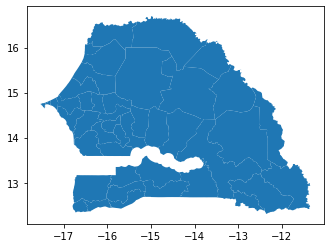

In [10]:
mx.plot()

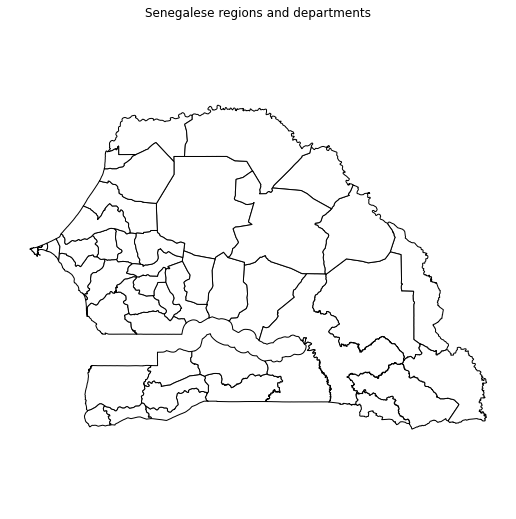

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax, figsize=(20, 12), color='white', edgecolor='black')
ax.set_axis_off()
ax.set_title('Senegalese regions and departments')
plt.axis('equal')
plt.show()

<ul> We will contrast the connectivity structure for the three following types of spatial weights:
    <li>Queen contiguity weights</li>
    <li>Block weights</li>
<li>Combination of Block+Queen weights</li></ul>
Beginning with Queen weights:


d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

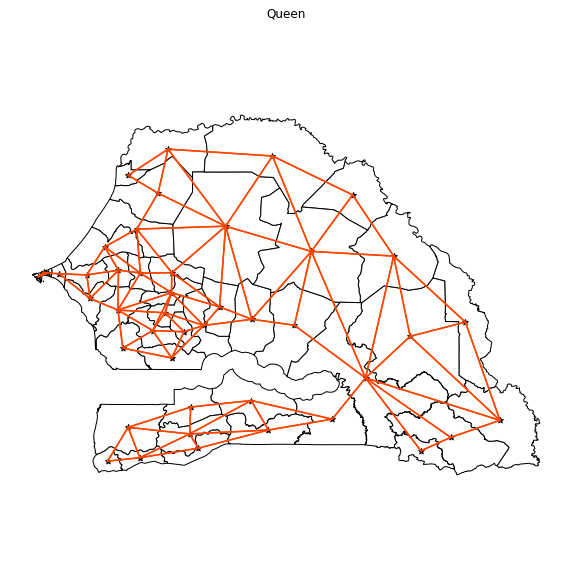

In [15]:
queen_mx = libpysal.weights.contiguity.Queen.from_dataframe(mx)
f, ax = plt.subplots(1, figsize=(10, 10))
mx.plot(ax=ax, edgecolor = 'black', color = 'white')
queen_mx.plot(mx,edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'),  ax=ax, )
ax.set_axis_off()
ax.set_title('Queen')
plt.axis('equal')
plt.show()

Block Weights

In [16]:
dakar = mx[mx['ADM1_FR'] == 'Dakar']

In [17]:
dakar.head()

,Shape_Leng,Shape_Area,ADM2_FR,ADM2_PCODE,ADM2_REF,ADM2ALT1FR,ADM2ALT2FR,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
6,0.635341,0.006849,Dakar,SN0101,None,None,None,Dakar,SN01,Senegal,SN,2017-08-04,2019-04-26,None,"MULTIPOLYGON (((-17.39918 14.67130, -17.39911 ..."
13,0.211544,0.001186,Guediawaye,SN0102,None,None,None,Dakar,SN01,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-17.37607 14.77143, -17.37783 14.769..."
32,0.419863,0.007376,Pikine,SN0103,None,None,None,Dakar,SN01,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-17.29313 14.77549, -17.29324 14.772..."
35,0.805722,0.030256,Rufisque,SN0104,None,None,None,Dakar,SN01,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-17.12789 14.75968, -17.12800 14.757..."


<AxesSubplot:>

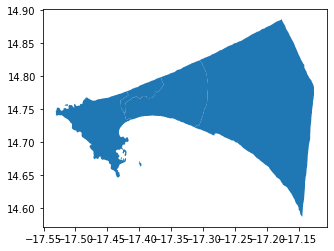

In [18]:
dakar.plot()

In [19]:
len(dakar)

4

There are 4 depatments in Dakar, that mean we have 4 blocks

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 4 islands with ids: 0, 1, 2, 3.
  warnings.warn(message)


Text(0.5, 1.0, 'Dakar region')

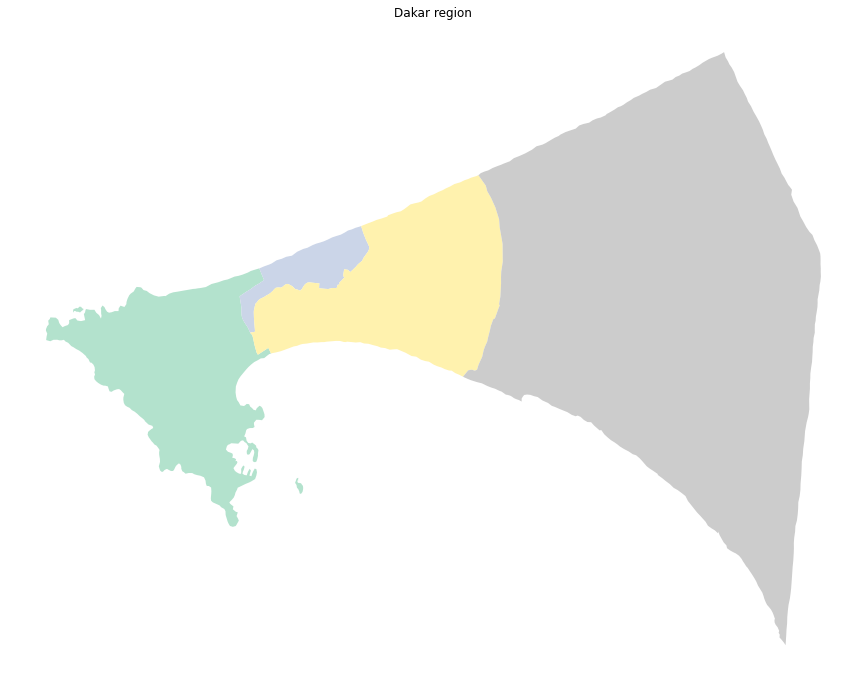

In [23]:
ax = dakar.plot(column='ADM2_FR', categorical=True, cmap='Pastel2', figsize=(20, 12))
block_dakar = libpysal.weights.util.block_weights(dakar['ADM2_FR'].values)
ax.set_axis_off()
ax.set_title('Dakar region')

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1306: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.apply(lambda p: p.x),
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1307: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.apply(lambda p: p.y),


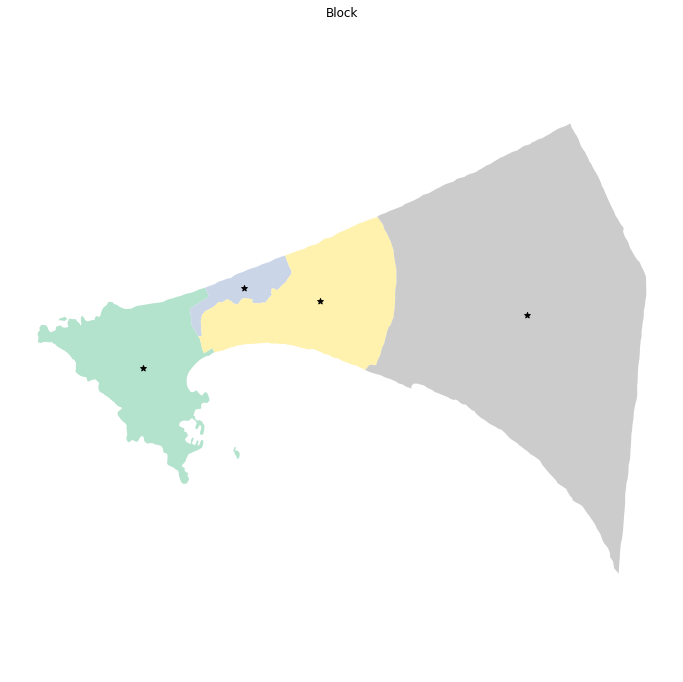

In [24]:
f, ax = plt.subplots(1, figsize=(12, 12))
dakar.plot(column='ADM2_FR', categorical=True, 
        cmap='Pastel2', ax=ax)
block_dakar.plot(dakar, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
                  node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block')
plt.axis('equal')
plt.show()

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

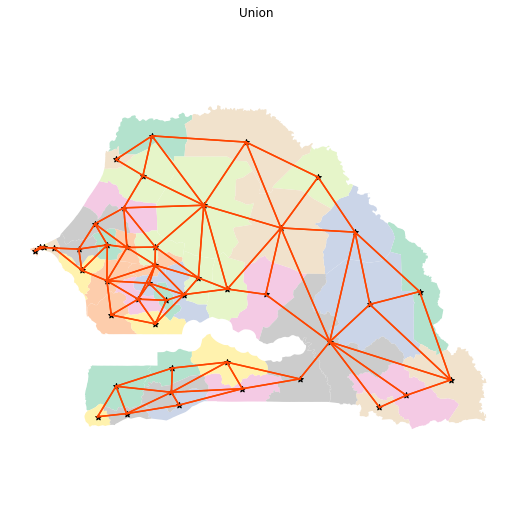

In [26]:
# Construct the union of queen contiguity and block weights
union_mx = libpysal.weights.set_operations.w_union(block_mx, queen_mx)

f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(column='ADM2_FR', categorical=True, cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Union ')
plt.axis('equal')
plt.show()

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

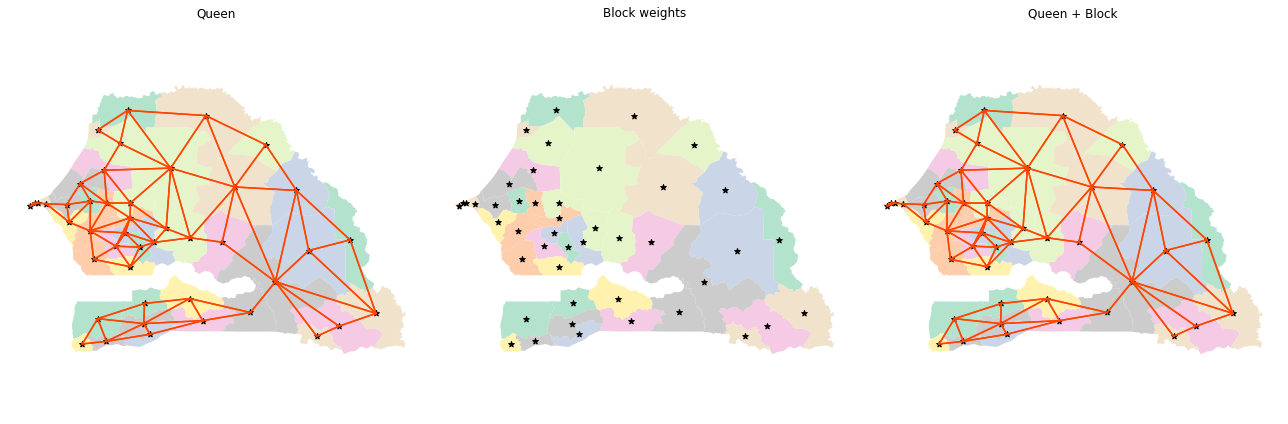

In [28]:
# we compare the three neighbor graphs side by side:

f, axs = plt.subplots(1, 3, figsize=(18, 6))


# Contiguity
ax = axs[0]
mx.plot(column='ADM2_FR', categorical=True, 
        cmap='Pastel2', ax=ax)
queen_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen')
ax.axis('equal')

# Block
ax = axs[1]
mx.plot(column='ADM2_FR', categorical=True, 
        cmap='Pastel2', ax=ax)
block_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block weights')
ax.axis('equal')

# Union
ax = axs[2]
mx.plot(column='ADM2_FR', categorical=True, 
        cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen + Block')
plt.axis('equal')
f.tight_layout()
plt.show()

In [29]:
# Sparsity measure
block_mx.pct_nonzero

0.0

In [30]:
queen_mx.pct_nonzero

9.481481481481481

Text(0.5, 1.0, 'Median Shape Area ')

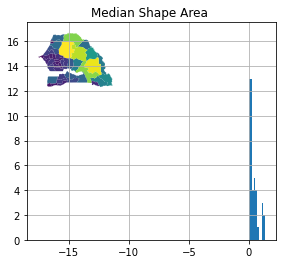

In [35]:
f,ax = plt.subplots(figsize=(12,4))
mx.plot('Shape_Area', ax=ax)
#ax[0].set_aspect('equal')
#ax[0].set_axis_off()
mx['Shape_Area'].hist(ax=ax)
ax.set_title("Median Shape Area ")

In [49]:
# largest departments
larg = mx.groupby(['Shape_Area']).size().sort_values(ascending=False)

In [52]:
larg

Shape_Area
1.348348    1
0.226022    1
0.220110    1
0.192200    1
0.187958    1
0.159570    1
0.159054    1
0.157485    1
0.144429    1
0.134918    1
0.121879    1
0.112038    1
0.108150    1
0.096306    1
0.094922    1
0.090652    1
0.073999    1
0.067855    1
0.030256    1
0.007376    1
0.006849    1
0.222759    1
0.228846    1
1.309963    1
0.238640    1
1.211154    1
1.116413    1
1.091902    1
0.730321    1
0.650679    1
0.588276    1
0.576605    1
0.561518    1
0.485176    1
0.478131    1
0.453593    1
0.443591    1
0.443401    1
0.392471    1
0.379994    1
0.333872    1
0.297909    1
0.259343    1
0.248125    1
0.001186    1
dtype: int64

(array([13., 13.,  4.,  5.,  4.,  1.,  0.,  0.,  3.,  2.]),
 array([1.18575017e-03, 1.35901972e-01, 2.70618194e-01, 4.05334415e-01,
        5.40050637e-01, 6.74766859e-01, 8.09483080e-01, 9.44199302e-01,
        1.07891552e+00, 1.21363175e+00, 1.34834797e+00]),
 <BarContainer object of 10 artists>)

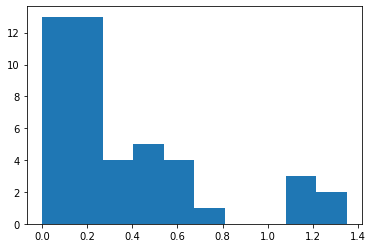

In [54]:
plt.hist(mx['Shape_Area'])

<AxesSubplot:>

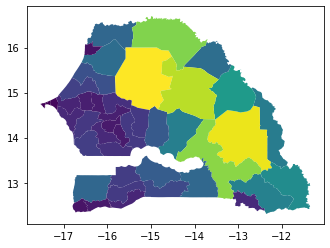

In [40]:
mx.plot(column='Shape_Area')

array([[<AxesSubplot:title={'center':'Shape_Leng'}>,
        <AxesSubplot:title={'center':'Shape_Area'}>]], dtype=object)

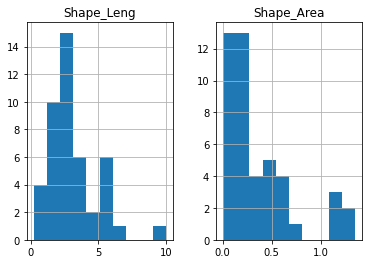

In [57]:
mx.hist()

In [59]:
adjlist = libpysal.weights.get_points_array_from_shapefile(fp)

In [61]:
adjlist.shape

(45, 2)

In [62]:
libpysal.weights.block_weights(adjlist)

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 45 disconnected components.
 There are 45 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44.
  warnings.warn(message)


## Contiguity Weights
A contiguous pair of spatial units are those who share a common border

In [92]:
w = libpysal.weights.contiguity.Rook.from_dataframe(mx)

In [126]:
# The cardinalities attribute reports the number of neighbors for each observation:
sen_cardinalities = w.cardinalities

In [129]:
sen_cardinalities

{0: 3,
 1: 5,
 2: 4,
 3: 4,
 4: 3,
 5: 4,
 6: 2,
 7: 6,
 8: 6,
 9: 3,
 10: 6,
 11: 4,
 12: 3,
 13: 2,
 14: 4,
 15: 6,
 16: 5,
 17: 5,
 18: 5,
 19: 3,
 20: 4,
 21: 3,
 22: 5,
 23: 8,
 24: 4,
 25: 5,
 26: 3,
 27: 5,
 28: 4,
 29: 4,
 30: 4,
 31: 2,
 32: 3,
 33: 4,
 34: 7,
 35: 3,
 36: 2,
 37: 2,
 38: 4,
 39: 6,
 40: 8,
 41: 4,
 42: 4,
 43: 3,
 44: 4}

In [130]:
# To see the distribution of these cardinates
w.histogram

[(2, 5), (3, 10), (4, 15), (5, 7), (6, 5), (7, 1), (8, 2)]

(array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 7 BarContainer objects>)

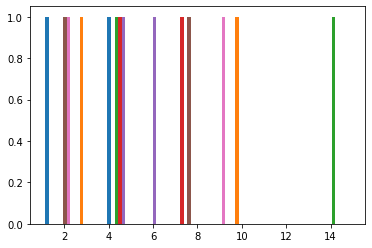

In [135]:
plt.hist(w.histogram)

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors.

**The above figure we see that there are 12 corner observations with three neighbors, four edge observations with five neighbors, and the one central observation has eight neighbors. There are also no observations with 14 (There are 14 regions in Senegal) or 13 neighbors.

In [139]:
# The number of joins in every pair of contiguous observations
w.s0

188.0

The pct_nonzero attribute provides a measure of the density (compliment of sparsity) of the spatial weights matrix 

In [140]:
w.pct_nonzero


9.283950617283951

In [120]:
senegal_adjalist = w.to_adjlist()

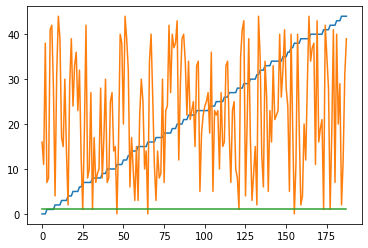

In [121]:
plt.plot(senegal_adjalist)

(array([[ 19.,  18.,  18.,  20.,  15.,  25.,  17.,  19.,  14.,  23.],
        [ 19.,  18.,  18.,  20.,  15.,  25.,  17.,  19.,  14.,  23.],
        [188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <a list of 3 BarContainer objects>)

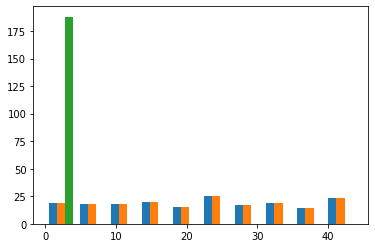

In [122]:
plt.hist(senegal_adjalist)

In [94]:
# There are 45 departments with the neighbors
w.neighbors

{0: [16, 11, 38],
 1: [7, 8, 41, 42, 28],
 2: [4, 31, 44, 39],
 3: [17, 15, 30, 14],
 4: [2, 29, 39],
 5: [24, 33, 36, 23],
 6: [32, 13],
 7: [1, 18, 42, 8, 10, 27],
 8: [1, 17, 7, 9, 10, 28],
 9: [8, 17, 30],
 10: [7, 8, 25, 27, 14, 15],
 11: [0, 16, 40, 38],
 12: [20, 44, 39],
 13: [32, 6],
 14: [17, 10, 3, 15],
 15: [3, 22, 30, 25, 10, 14],
 16: [0, 34, 40, 26, 11],
 17: [3, 14, 8, 9, 30],
 18: [7, 23, 24, 42, 27],
 19: [40, 37, 38],
 20: [43, 12, 29, 39],
 21: [40, 34, 22],
 22: [34, 21, 23, 25, 15],
 23: [33, 34, 5, 18, 22, 24, 25, 27],
 24: [18, 36, 5, 23],
 25: [22, 23, 10, 27, 15],
 26: [16, 33, 34],
 27: [18, 7, 23, 25, 10],
 28: [8, 1, 35, 41],
 29: [43, 4, 20, 39],
 30: [17, 3, 9, 15],
 31: [2, 44],
 32: [35, 13, 6],
 33: [34, 26, 5, 23],
 34: [16, 33, 21, 22, 23, 40, 26],
 35: [32, 41, 28],
 36: [24, 5],
 37: [40, 19],
 38: [0, 11, 40, 19],
 39: [2, 4, 20, 12, 29, 44],
 40: [34, 37, 38, 11, 43, 16, 19, 21],
 41: [1, 42, 35, 28],
 42: [1, 18, 41, 7],
 43: [40, 20, 29],
 44: 

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

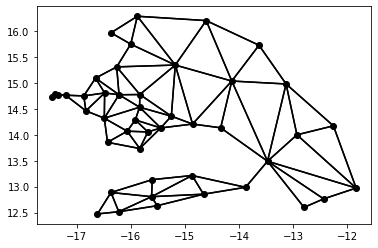

In [89]:
w.plot(mx)

In [95]:
# Quin contiguity for Dakar region, the capital city of Senegal
dakar_queen_weight = libpysal.weights.contiguity.Rook.from_dataframe(dakar)

In [91]:
dakar.neighbors

{0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [2]}

In [118]:
dakar_queen_weight.to_adjlist()

,focal,neighbor,weight
0,0,1,1.0
1,0,2,1.0
2,1,0,1.0
3,1,2,1.0
4,2,0,1.0
5,2,1,1.0
6,2,3,1.0
7,3,2,1.0


In [123]:
# The cardinalities attribute reports the number of neighbors for each observation:
dakar_queen_weight.cardinalities

{0: 2, 1: 2, 2: 3, 3: 1}

I've been in Kaolack Region last mobnth (i'll update the date of this study then you can know which month --little december funny) 

In [101]:
kaolack = mx[mx.ADM1_FR == 'Kaolack']

In [102]:
kaolack

,Shape_Leng,Shape_Area,ADM2_FR,ADM2_PCODE,ADM2_REF,ADM2ALT1FR,ADM2ALT2FR,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
14,1.511195,0.090652,Guinguineo,SN0501,None,None,None,Kaolack,SN05,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-15.69259 14.37815, -15.69200 14.375..."
17,2.386416,0.157485,Kaolack,SN0502,None,None,None,Kaolack,SN05,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-16.10151 14.36630, -16.09052 14.365..."
30,2.219603,0.192200,Nioro Du Rip,SN0503,None,None,None,Kaolack,SN05,Senegal,SN,2017-08-04,2019-04-26,None,"POLYGON ((-15.79953 13.91167, -15.79649 13.910..."


<AxesSubplot:>

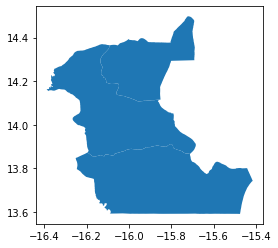

In [111]:
kaolack.plot()

In [103]:
wg_kaolack = libpysal.weights.contiguity.Rook.from_dataframe(kaolack)

In [106]:
wg_kaolack.neighbors

{0: [1], 1: [0, 2], 2: [1]}

In [117]:
wg_kaolack.to_adjlist()

,focal,neighbor,weight
0,0,1,1.0
1,1,0,1.0
2,1,2,1.0
3,2,1,1.0


** Let's continue on entire Senegal

### We have created above a queen contiguity already with w as a variable, here we change the variable to wq

In [75]:
wq = libpysal.weights.contiguity.Queen.from_dataframe(mx)

Visualize the adjacency relationships, but they are much more difficult to see without showing a closer detail:


d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

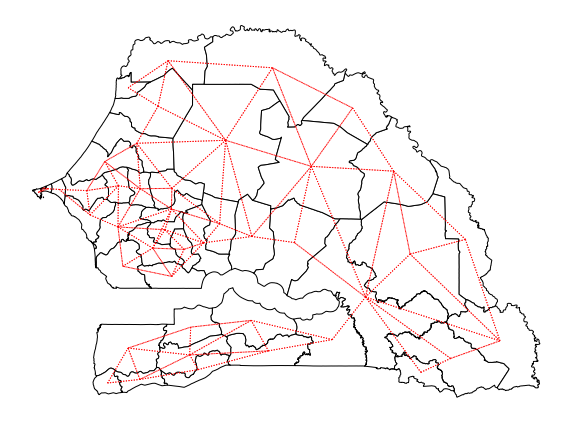

In [79]:
ax = mx.plot(edgecolor='k', facecolor='w', figsize=(10,10))
wq.plot(mx, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [81]:
print(wq.n)
print(wq.pct_nonzero)

45
9.481481481481481


We have a small number of spatial units only 45 and the cardinalities have a radically different distribution:

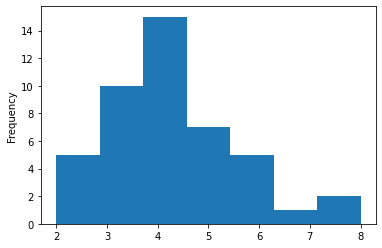

In [82]:
s = pd.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

As the minimum number of neighbors is 2, while there is one polygon with 8 queen neighbors. The most common number of neighbors is 4.


## Creating a Rook Weights for reginos and department in Senegal

In [65]:
wr = libpysal.weights.contiguity.Rook.from_dataframe(mx)

d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

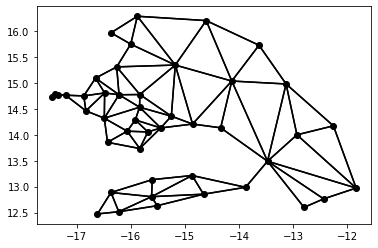

In [67]:
wr.plot(mx)

In [71]:
wr.pct_nonzero

9.283950617283951

In [141]:
wr.neighbors

{0: [16, 11, 38],
 1: [7, 8, 41, 42, 28],
 2: [4, 31, 44, 39],
 3: [17, 15, 30, 14],
 4: [2, 29, 39],
 5: [24, 33, 36, 23],
 6: [32, 13],
 7: [1, 18, 42, 8, 10, 27],
 8: [1, 17, 7, 9, 10, 28],
 9: [8, 17, 30],
 10: [7, 8, 25, 27, 14, 15],
 11: [0, 16, 40, 38],
 12: [20, 44, 39],
 13: [32, 6],
 14: [17, 10, 3, 15],
 15: [3, 22, 30, 25, 10, 14],
 16: [0, 34, 40, 26, 11],
 17: [3, 14, 8, 9, 30],
 18: [7, 23, 24, 42, 27],
 19: [40, 37, 38],
 20: [43, 12, 29, 39],
 21: [40, 34, 22],
 22: [34, 21, 23, 25, 15],
 23: [33, 34, 5, 18, 22, 24, 25, 27],
 24: [18, 36, 5, 23],
 25: [22, 23, 10, 27, 15],
 26: [16, 33, 34],
 27: [18, 7, 23, 25, 10],
 28: [8, 1, 35, 41],
 29: [43, 4, 20, 39],
 30: [17, 3, 9, 15],
 31: [2, 44],
 32: [35, 13, 6],
 33: [34, 26, 5, 23],
 34: [16, 33, 21, 22, 23, 40, 26],
 35: [32, 41, 28],
 36: [24, 5],
 37: [40, 19],
 38: [0, 11, 40, 19],
 39: [2, 4, 20, 12, 29, 44],
 40: [34, 37, 38, 11, 43, 16, 19, 21],
 41: [1, 42, 35, 28],
 42: [1, 18, 41, 7],
 43: [40, 20, 29],
 44: 

All Rook neighbors are also Queen neighbors, since Queen includes neighbors that share an edge. But, not all Queen neighbors are Rook neighbors, since some Queen neighbors only share a point on their boundaries in common

## Knn weights¶
The first type of distance based weights defines the neighbor set of a particular observation as containing its nearest k observations,

To do so we develop a representative point for each of the polygons using the so called “center of mass” or centroid.

In [145]:
knn4_bad = libpysal.weights.distance.KNN.from_dataframe(mx, k=4) # ignore curvature of the earth


d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
d:\programm files\python 3 8 6\lib\site-packages\libpysal\weights\weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

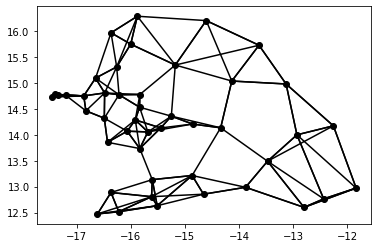

In [148]:
knn4_bad.plot(mx)

In [150]:
knn4_bad.histogram

[(4, 45)]

In [152]:
knn4_bad[0]

{11: 1.0, 16: 1.0, 38: 1.0, 40: 1.0}

In [153]:
[i for i in knn4_bad]

[(0, {11: 1.0, 16: 1.0, 38: 1.0, 40: 1.0}),
 (1, {7: 1.0, 42: 1.0, 41: 1.0, 8: 1.0}),
 (2, {44: 1.0, 31: 1.0, 39: 1.0, 4: 1.0}),
 (3, {15: 1.0, 14: 1.0, 30: 1.0, 17: 1.0}),
 (4, {39: 1.0, 12: 1.0, 30: 1.0, 29: 1.0}),
 (5, {24: 1.0, 36: 1.0, 18: 1.0, 23: 1.0}),
 (6, {13: 1.0, 32: 1.0, 35: 1.0, 41: 1.0}),
 (7, {1: 1.0, 27: 1.0, 10: 1.0, 8: 1.0}),
 (8, {28: 1.0, 9: 1.0, 1: 1.0, 17: 1.0}),
 (9, {17: 1.0, 8: 1.0, 30: 1.0, 14: 1.0}),
 (10, {27: 1.0, 14: 1.0, 7: 1.0, 3: 1.0}),
 (11, {0: 1.0, 40: 1.0, 16: 1.0, 19: 1.0}),
 (12, {39: 1.0, 4: 1.0, 44: 1.0, 29: 1.0}),
 (13, {32: 1.0, 6: 1.0, 35: 1.0, 41: 1.0}),
 (14, {10: 1.0, 17: 1.0, 3: 1.0, 15: 1.0}),
 (15, {3: 1.0, 25: 1.0, 14: 1.0, 30: 1.0}),
 (16, {26: 1.0, 11: 1.0, 34: 1.0, 0: 1.0}),
 (17, {14: 1.0, 3: 1.0, 30: 1.0, 9: 1.0}),
 (18, {42: 1.0, 24: 1.0, 7: 1.0, 1: 1.0}),
 (19, {37: 1.0, 38: 1.0, 40: 1.0, 11: 1.0}),
 (20, {29: 1.0, 43: 1.0, 12: 1.0, 39: 1.0}),
 (21, {22: 1.0, 34: 1.0, 25: 1.0, 29: 1.0}),
 (22, {25: 1.0, 21: 1.0, 15: 1.0, 3: 1.0